In [7]:
pip install faiss-cpu

In [8]:
import numpy as np 
import faiss  # this will import the faiss library

In [9]:
import pandas as pd

In [10]:
##FAISS

In [11]:
import numpy as np
from numpy.linalg import norm
import pickle
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [12]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(180, 180, 3))
def extract_features(img_path, model):
    input_shape = (180, 180, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [ ]:
# features = extract_features('116066_0.jpg', model)
# print(len(features))

73728


In [13]:
extensions = ['.jpg', '.JPG', '.jpeg', '.JPEG', '.png', '.PNG']
def get_file_list(root_dir):
    file_list = []
    counter = 1
    for root, directories, filenames in os.walk(root_dir):
        for filename in filenames:
            if any(ext in filename for ext in extensions):
                file_list.append(os.path.join(root, filename))
                counter += 1
    return file_list

In [14]:
root_dir = './'
filenames = sorted(get_file_list(root_dir))

In [15]:
feature_list = []
for i in tqdm_notebook(range(len(filenames))):
    feature_list.append(extract_features(filenames[i], model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [16]:
len(filenames)

413

In [17]:
feature_list

[array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00678593], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00092145], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00616299], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00615034], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0107869], dtype=float32),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00038226], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..

In [18]:
feature_list=np.array(feature_list)

In [19]:
type(feature_list)

numpy.ndarray

In [20]:
feature_list.shape

(413, 73728)

In [21]:
dimension = 73728    # dimensions of each vector                         
n = len(filenames)    # number of vectors                   
np.random.seed(1)             
db_vectors = feature_list #np.random.random((n, dimension)).astype('float32')

In [22]:
db_vectors.shape

(413, 73728)

In [23]:
nlist = 1  # number of clusters
quantiser = faiss.IndexFlatL2(dimension)  
index = faiss.IndexIVFFlat(quantiser, dimension, nlist,   faiss.METRIC_L2)

In [24]:
print(index.is_trained)   # False
index.train(db_vectors)  # train on the database vectors
print(index.ntotal)   # 0
index.add(db_vectors)   # add the vectors and update the index
print(index.is_trained)  # True
print(index.ntotal)   # 200

False
0
True
413


In [25]:
# nprobe = 1  # find 2 most similar clusters
# n_query = 1  
# k = 10  # return 3 nearest neighbours
# np.random.seed(0)   
# query_vectors = features#np.random.random((n_query, dimension)).astype('float32')
# distances, indices = index.search(query_vectors, k)

NameError: ignored

In [26]:
feature=features.reshape(1,73728)
features.shape

NameError: ignored

In [29]:
nprobe = 1  # find 2 most similar clusters
n_query = 20  
k = 10  # return 3 nearest neighbours
np.random.seed(0)   
query_vectors = feature_list#np.random.random((n_query, dimension)).astype('float32')
distances, indices = index.search(query_vectors, k)

In [30]:
distances

array([[0.        , 0.953531  , 0.9715614 , ..., 1.0918338 , 1.1004443 ,
        1.1175106 ],
       [0.        , 0.66976976, 0.75395006, ..., 0.8596133 , 0.86081916,
        0.8658406 ],
       [0.        , 1.1182251 , 1.123905  , ..., 1.1653368 , 1.1658156 ,
        1.1937413 ],
       ...,
       [0.        , 1.1504419 , 1.1558669 , ..., 1.2646146 , 1.2817041 ,
        1.2869562 ],
       [0.        , 0.82307196, 0.82940245, ..., 1.0798419 , 1.0917605 ,
        1.0922977 ],
       [0.        , 1.0547585 , 1.0661646 , ..., 1.1397015 , 1.1519458 ,
        1.1587919 ]], dtype=float32)

In [31]:
len(distances)

413

In [32]:
indices

array([[  0, 161, 411, ...,  12,  11,  54],
       [  1, 130, 284, ...,  89, 259, 312],
       [  2,  18, 338, ..., 286,  72, 305],
       ...,
       [410, 375, 340, ..., 319, 360, 188],
       [411,  54, 161, ..., 307,  11, 346],
       [412, 214, 328, ...,  13, 270,   9]])

In [33]:
faiss.write_index(index,"vector.index")  # save the index to 
# diskindex = faiss.read_index("vector.index")  # load the index 

In [34]:
diskindex = faiss.read_index("vector.index")

In [35]:
type(feature_list)

numpy.ndarray

In [36]:
feature_list.shape

(413, 73728)

In [37]:
pickle.dump(feature_list, open('features-caltech101-resnet.pickle', 'wb'))
pickle.dump(filenames, open('filenames-caltech101.pickle','wb'))

In [38]:
filenames = pickle.load(open('filenames-caltech101.pickle', 'rb'))
feature_list = pickle.load(open('features-caltech101-resnet.pickle', 'rb'))

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [40]:
indices

array([[  0, 161, 411, ...,  12,  11,  54],
       [  1, 130, 284, ...,  89, 259, 312],
       [  2,  18, 338, ..., 286,  72, 305],
       ...,
       [410, 375, 340, ..., 319, 360, 188],
       [411,  54, 161, ..., 307,  11, 346],
       [412, 214, 328, ...,  13, 270,   9]])

In [41]:
filenames[1]

'./1008785_1.jpg'

In [42]:
filenames

['./1006041_1.jpg',
 './1008785_1.jpg',
 './1026722_0.jpg',
 './1026731_0.jpg',
 './1030804_0.jpg',
 './1030804_1.jpg',
 './1030804_2.jpg',
 './1030804_3.jpg',
 './1036341_1.jpg',
 './1039403_0.jpg',
 './1044088_0.jpg',
 './1052815_0.jpg',
 './1052815_1.jpg',
 './1055364_0.jpg',
 './1056191_0.jpg',
 './1056191_1.jpg',
 './1056191_2.jpg',
 './1056191_3.jpg',
 './1063012_0.jpg',
 './1084483_0.jpg',
 './1092778_2.jpg',
 './1109257_0.jpg',
 './1109257_1.jpg',
 './1109257_2.jpg',
 './1115571_2.jpg',
 './112172_0.jpg',
 './1132290_0.jpg',
 './1141295_0.jpg',
 './1141295_1.jpg',
 './1151476_0.jpg',
 './1154812_0.jpg',
 './1160789_0.jpg',
 './1169401_0.jpg',
 './1176962_1.jpg',
 './1177265_0.jpg',
 './1197079_0.jpg',
 './1197079_1.jpg',
 './1211380_0.jpg',
 './1212545_0.jpg',
 './1225066_0.jpg',
 './1231297_0.jpg',
 './1236242_0.jpg',
 './1236242_1.jpg',
 './1253010_0.jpg',
 './1260869_0.jpg',
 './1260869_1.jpg',
 './1260869_2.jpg',
 './1267201_0.jpg',
 './1268790_0.jpg',
 './1270642_0.jpg',
 

In [43]:
filenaam = [i.split('/')[1] for i in filenames]

In [44]:
filenaam

['1006041_1.jpg',
 '1008785_1.jpg',
 '1026722_0.jpg',
 '1026731_0.jpg',
 '1030804_0.jpg',
 '1030804_1.jpg',
 '1030804_2.jpg',
 '1030804_3.jpg',
 '1036341_1.jpg',
 '1039403_0.jpg',
 '1044088_0.jpg',
 '1052815_0.jpg',
 '1052815_1.jpg',
 '1055364_0.jpg',
 '1056191_0.jpg',
 '1056191_1.jpg',
 '1056191_2.jpg',
 '1056191_3.jpg',
 '1063012_0.jpg',
 '1084483_0.jpg',
 '1092778_2.jpg',
 '1109257_0.jpg',
 '1109257_1.jpg',
 '1109257_2.jpg',
 '1115571_2.jpg',
 '112172_0.jpg',
 '1132290_0.jpg',
 '1141295_0.jpg',
 '1141295_1.jpg',
 '1151476_0.jpg',
 '1154812_0.jpg',
 '1160789_0.jpg',
 '1169401_0.jpg',
 '1176962_1.jpg',
 '1177265_0.jpg',
 '1197079_0.jpg',
 '1197079_1.jpg',
 '1211380_0.jpg',
 '1212545_0.jpg',
 '1225066_0.jpg',
 '1231297_0.jpg',
 '1236242_0.jpg',
 '1236242_1.jpg',
 '1253010_0.jpg',
 '1260869_0.jpg',
 '1260869_1.jpg',
 '1260869_2.jpg',
 '1267201_0.jpg',
 '1268790_0.jpg',
 '1270642_0.jpg',
 '1275914_0.jpg',
 '1275914_1.jpg',
 '1275914_2.jpg',
 '1278044_0.jpg',
 '1283257_0.jpg',
 '1286631_0

In [45]:
index = []
for i in range(len(filenaam)):
  index.append(i)

In [46]:
index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [47]:
df = pd.DataFrame()
# df['index'] = index
df['images'] = filenaam

In [48]:
df

,images
0,1006041_1.jpg
1,1008785_1.jpg
2,1026722_0.jpg
3,1026731_0.jpg
4,1030804_0.jpg
...,...
408,977773_0.jpg
409,982234_0.jpg
410,982234_1.jpg
411,983256_0.jpg


In [49]:
indices_df = pd.DataFrame(indices)
indices_df

,0,1,2,3,4,5,6,7,8,9
0,0,161,411,56,55,181,159,12,11,54
1,1,130,284,57,78,118,179,89,259,312
2,2,18,338,9,27,208,28,286,72,305
3,3,183,332,242,392,337,64,282,390,101
4,4,7,5,353,6,304,282,49,354,352
...,...,...,...,...,...,...,...,...,...,...
408,408,175,346,176,375,340,127,209,319,288
409,409,360,361,362,181,364,140,56,55,82
410,410,375,340,307,409,159,403,319,360,188
411,411,54,161,181,0,56,55,307,11,346


In [57]:
# # for i in indices_df.items:
#   if i = df['']

In [51]:
df

,images
0,1006041_1.jpg
1,1008785_1.jpg
2,1026722_0.jpg
3,1026731_0.jpg
4,1030804_0.jpg
...,...
408,977773_0.jpg
409,982234_0.jpg
410,982234_1.jpg
411,983256_0.jpg


In [52]:
df1 = df.to_dict()
df1 = df1['images']

In [53]:
df1

{0: '1006041_1.jpg',
 1: '1008785_1.jpg',
 2: '1026722_0.jpg',
 3: '1026731_0.jpg',
 4: '1030804_0.jpg',
 5: '1030804_1.jpg',
 6: '1030804_2.jpg',
 7: '1030804_3.jpg',
 8: '1036341_1.jpg',
 9: '1039403_0.jpg',
 10: '1044088_0.jpg',
 11: '1052815_0.jpg',
 12: '1052815_1.jpg',
 13: '1055364_0.jpg',
 14: '1056191_0.jpg',
 15: '1056191_1.jpg',
 16: '1056191_2.jpg',
 17: '1056191_3.jpg',
 18: '1063012_0.jpg',
 19: '1084483_0.jpg',
 20: '1092778_2.jpg',
 21: '1109257_0.jpg',
 22: '1109257_1.jpg',
 23: '1109257_2.jpg',
 24: '1115571_2.jpg',
 25: '112172_0.jpg',
 26: '1132290_0.jpg',
 27: '1141295_0.jpg',
 28: '1141295_1.jpg',
 29: '1151476_0.jpg',
 30: '1154812_0.jpg',
 31: '1160789_0.jpg',
 32: '1169401_0.jpg',
 33: '1176962_1.jpg',
 34: '1177265_0.jpg',
 35: '1197079_0.jpg',
 36: '1197079_1.jpg',
 37: '1211380_0.jpg',
 38: '1212545_0.jpg',
 39: '1225066_0.jpg',
 40: '1231297_0.jpg',
 41: '1236242_0.jpg',
 42: '1236242_1.jpg',
 43: '1253010_0.jpg',
 44: '1260869_0.jpg',
 45: '1260869_1.jpg',

In [54]:
indices_df

,0,1,2,3,4,5,6,7,8,9
0,0,161,411,56,55,181,159,12,11,54
1,1,130,284,57,78,118,179,89,259,312
2,2,18,338,9,27,208,28,286,72,305
3,3,183,332,242,392,337,64,282,390,101
4,4,7,5,353,6,304,282,49,354,352
...,...,...,...,...,...,...,...,...,...,...
408,408,175,346,176,375,340,127,209,319,288
409,409,360,361,362,181,364,140,56,55,82
410,410,375,340,307,409,159,403,319,360,188
411,411,54,161,181,0,56,55,307,11,346


In [55]:
indices_df = indices_df.replace(df1)
indices_df

,0,1,2,3,4,5,6,7,8,9
0,1006041_1.jpg,1794790_1.jpg,983256_0.jpg,1286631_1.jpg,1286631_0.jpg,1957545_0.jpg,1786827_0.jpg,1052815_1.jpg,1052815_0.jpg,1283257_0.jpg
1,1008785_1.jpg,164551_0.jpg,403925_0.jpg,1295791_0.jpg,139693_0.jpg,1590846_0.jpg,194441_0.jpg,1457890_0.jpg,325224_0.jpg,573181_0.jpg
2,1026722_0.jpg,1063012_0.jpg,680660_0.jpg,1039403_0.jpg,1141295_0.jpg,2082446_0.jpg,1141295_1.jpg,425051_0.jpg,135567_0.jpg,52734_0.jpg
3,1026731_0.jpg,1964332_0.jpg,664385_1.jpg,238697_1.jpg,92429_0.jpg,676600_0.jpg,1325342_0.jpg,38710_0.jpg,918770_0.jpg,1497135_0.jpg
4,1030804_0.jpg,1030804_3.jpg,1030804_1.jpg,733529_2.jpg,1030804_2.jpg,518866_0.jpg,38710_0.jpg,1270642_0.jpg,733529_3.jpg,733529_1.jpg
...,...,...,...,...,...,...,...,...,...,...
408,977773_0.jpg,1909762_0.jpg,712329_0.jpg,1909762_1.jpg,80746_0.jpg,687181_0.jpg,1634047_0.jpg,2082545_0.jpg,594255_0.jpg,43259_0.jpg
409,982234_0.jpg,746273_0.jpg,746273_1.jpg,746273_2.jpg,1957545_0.jpg,750334_0.jpg,1703449_0.jpg,1286631_1.jpg,1286631_0.jpg,142634_0.jpg
410,982234_1.jpg,80746_0.jpg,687181_0.jpg,564539_0.jpg,982234_0.jpg,1786827_0.jpg,964386_2.jpg,594255_0.jpg,746273_0.jpg,1987193_0.jpg
411,983256_0.jpg,1283257_0.jpg,1794790_1.jpg,1957545_0.jpg,1006041_1.jpg,1286631_1.jpg,1286631_0.jpg,564539_0.jpg,1052815_0.jpg,712329_0.jpg


In [56]:
# This cell is Only for Google Colab
from google.colab import files
indices_df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This is the last cell
Don't run after this

In [ ]:
for i in range(5):
    print(distances[0][i])

0.0
1.0214021
1.2580189
1.4101483
1.4215083


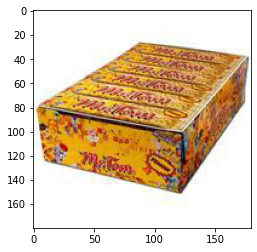

In [ ]:
plt.imshow(mpimg.imread(filenames[4]))

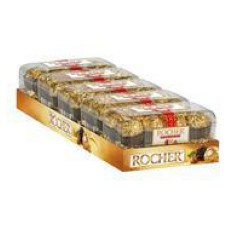

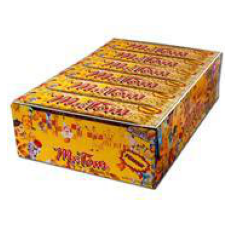

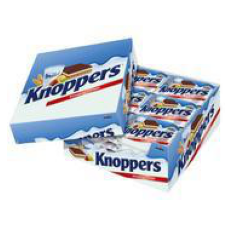

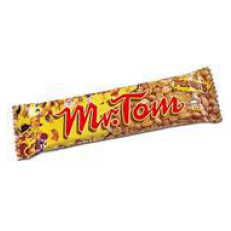

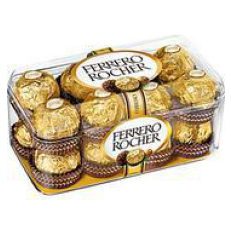

In [ ]:
for i in range(indices.shape[1]):
  plt.imshow(mpimg.imread(filenames[indices[0][i]]))
  plt.axis('off')
  plt.show()
